In [39]:
import pandas as pd
import numpy as np

#Imports data file fastfood.csv into panda df object
fastfood_df = pd.read_csv('fastfood.csv', header=0, sep=',')

#Prints the dimensions of the dataset
print("Dimensions of the dataset: ", fastfood_df.shape)

#Prints the data types of each column
print("Data types of each column:\n", fastfood_df.dtypes)

#Prints the file type
print("File type: CSV")

#An example of the import method is 'import pandas as pd' statement
#which imports the pandas library, allowing you to use its 
#functions and classes. The pd.read_csv() function from pandas is then 
#used to read the CSV file named "fastfood.csv" and 
#store it in a DataFrame named fastfood_df

Dimensions of the dataset:  (515, 17)
Data types of each column:
 restaurant      object
item            object
calories         int64
cal_fat          int64
total_fat        int64
sat_fat        float64
trans_fat      float64
cholesterol      int64
sodium           int64
total_carb       int64
fiber          float64
sugar            int64
protein        float64
vit_a          float64
vit_c          float64
calcium        float64
salad           object
dtype: object
File type: CSV


In [40]:
fastfood_df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [41]:
#Checking all the rows for missing values
missing_values_count = fastfood_df.isnull().sum()

print("Missing Values Count:\n", missing_values_count)



Missing Values Count:
 restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64


In [42]:
#filling in NA values as 0 (assume food doesn't contain)
fastfood_df['vit_a'] = fastfood_df['vit_a'].fillna(0)
fastfood_df['vit_c'] = fastfood_df['vit_c'].fillna(0)
fastfood_df['calcium'] = fastfood_df['calcium'].fillna(0)
fastfood_df['protein'] = fastfood_df['protein'].fillna(0)
fastfood_df['fiber'] = fastfood_df['fiber'].fillna(0)


fastfood_df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [43]:
fastfood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        515 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      515 non-null    float64
 13  vit_a        515 non-null    float64
 14  vit_c        515 non-null    float64
 15  calcium      515 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [44]:
nutritional_variables = ['total_carb', 'protein', 'total_fat']

nutritional_weights = {'total_carb': 0.05, 'protein': 0.3, 'total_fat': 0.7}

fastfood_df['Total Nutritional Score'] = (fastfood_df[nutritional_variables] * nutritional_weights).sum(axis=1)

fastfood_df.sort_values('Total Nutritional Score', ascending=False, inplace=True)

threshold = 0.7  # Define the desired threshold
selected_meals = fastfood_df[fastfood_df['Total Nutritional Score'] >= threshold]

# Filter meals with less than 2400 calories
filtered_meals = fastfood_df[(fastfood_df['calories'] < 2400) & (fastfood_df['total_carb'] <= 30) & (fastfood_df['protein'] <= 160) & (fastfood_df['total_fat'] <= 182)]

print(filtered_meals)



      restaurant                                               item  calories  \
192  Burger King                            American Brewhouse King      1550   
279  Dairy Queen                               Regular Cheese Curds       550   
222  Burger King  Bacon Cheddar Ranch Chicken Salad w/ grilled C...       590   
224  Burger King               Chicken BLT Salad w/ Grilled Chicken       550   
376       Subway  Chicken & Bacon Ranch Melt Salad (includes Ran...       510   
..           ...                                                ...       ...   
72   Chick Fil-A                    4 Piece Grilled Chicken Nuggets        70   
187        Arbys                                 Chopped Side Salad        70   
363       Subway                        Kids Mini Sub Veggie Delite       150   
392       Subway                                Veggie Delite Salad        50   
302  Dairy Queen                                         Side Salad        20   

     cal_fat  total_fat  sa

In [45]:
#Average caloric, fat, and carb means 
calorie_means = fastfood_df["calories"].mean()
print(calorie_means)

fat_means = fastfood_df["total_fat"].mean()
print(fat_means)

carbs_means = fastfood_df["protein"].mean()
print(carbs_means)

530.9126213592233
26.59029126213592
27.836893203883495


In [46]:
#Collects the top 5 highest protein foods and general information
highest_protein_df = fastfood_df.sort_values(by = 'protein', ascending = False)
print(highest_protein_df[['restaurant','item','protein','calories']].head(5))

      restaurant                                        item  protein  \
39     Mcdonalds  20 piece Buttermilk Crispy Chicken Tenders    186.0   
192  Burger King                     American Brewhouse King    134.0   
38     Mcdonalds  12 piece Buttermilk Crispy Chicken Tenders    115.0   
69   Chick Fil-A                    30 piece Chicken Nuggets    103.0   
44     Mcdonalds                  40 piece Chicken McNuggets     98.0   

     calories  
39       2430  
192      1550  
38       1510  
69        970  
44       1770  


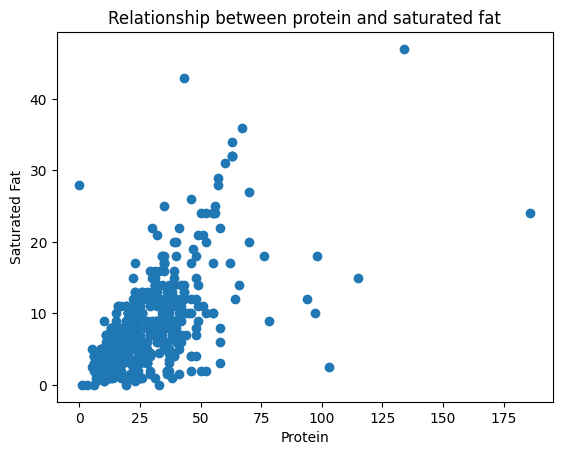

Correlation Index:  0.5870785944164151


In [47]:
#Imports plots
import matplotlib as mpl
import matplotlib.pyplot as plt

#Looks for a correlation between high protein and saturated fat 
plt.scatter(fastfood_df['protein'], fastfood_df['sat_fat'])
plt.title("Relationship between protein and saturated fat")
plt.xlabel('Protein')
plt.ylabel('Saturated Fat')
plt.show()

index_corr = fastfood_df['protein'].corr(fastfood_df['sat_fat'])
print("Correlation Index: ", index_corr)

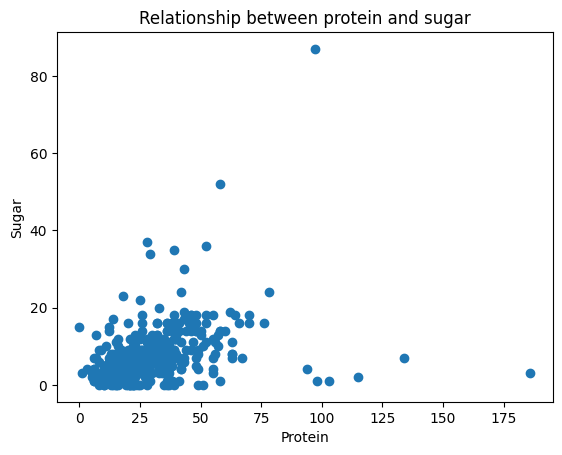

Correlation Index:  0.385015240005327


In [48]:
#Looks for a correlation between high protein and sugar
plt.scatter(fastfood_df['protein'], fastfood_df['sugar'])
plt.title("Relationship between protein and sugar")
plt.xlabel('Protein')
plt.ylabel('Sugar')
plt.show()

index_corr = fastfood_df['protein'].corr(fastfood_df['sugar'])
print("Correlation Index: ", index_corr)

## Data Analytics <a class="anchor" id="data-analytics"></a>

In [49]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb

In [67]:
train_df = fastfood_df[fastfood_df.columns.difference(['calories', 'restaurant', 'item', 'salad'])]

# independent variable: calories
# removed the categorical variables

In [51]:
#Validation function
n_folds = 5

def rmse_cv(model,n_folds):
    kf=KFold(n_splits=n_folds)
    rmse = np.sqrt(-cross_val_score(model, train_df, fastfood_df.calories, scoring="neg_mean_squared_error", cv = kf))
    return rmse

In [52]:
lr_w_int = LinearRegression()
lr_no_int = LinearRegression(fit_intercept=False)

In [53]:
neigh = KNeighborsRegressor(n_neighbors=10)

In [54]:
rf = RandomForestRegressor(n_estimators=100)

In [55]:
dt = DecisionTreeRegressor(max_depth = 10)

In [56]:
model_xgb = xgb.XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.01)

In [57]:
model_lgb = lgb.LGBMRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000)

#### Algorithm Results on a 5 Fold Cross Validation

In [58]:
score_linear = rmse_cv(lr_w_int,n_folds)
print("Linear Regression (w/ Intercept) score: {:.4f} ({:.4f})\n".format(score_linear.mean(), score_linear.std()))

Linear Regression (w/ Intercept) score: 30.9399 (34.9017)



Linear regression does not generalize well. Removing the intercept adds something called regularization that generalizes better.

In [59]:
score_linear_no_int = rmse_cv(lr_no_int,n_folds)
print("Linear Regression (No Intercept) score: {:.4f} ({:.4f})\n".format(score_linear_no_int.mean(), score_linear_no_int.std()))

Linear Regression (No Intercept) score: 30.7144 (34.9430)



In [60]:
score_neigh = rmse_cv(neigh,n_folds)
print("Nearest Neighbor (13) score: {:.4f} ({:.4f})\n".format(score_neigh.mean(), score_neigh.std()))

Nearest Neighbor (13) score: 158.5063 (119.0352)



In [61]:
score_dt = rmse_cv(dt,n_folds)
print("Decision Tree Regression score: {:.4f} ({:.4f})\n".format(score_dt.mean(), score_dt.std()))

Decision Tree Regression score: 133.1505 (108.7381)



In [62]:
score_rf = rmse_cv(rf,n_folds)
print("Random Forest Regression score: {:.4f} ({:.4f})\n".format(score_rf.mean(), score_rf.std()))

Random Forest Regression score: 110.2950 (121.3100)



In [63]:
score_xg = rmse_cv(model_xgb,n_folds)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score_xg.mean(), score_xg.std()))

Xgboost score: 102.4115 (123.0296)



In [64]:
score_lgbm = rmse_cv(model_lgb,n_folds)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score_lgbm.mean(), score_lgbm.std()))

LGBM score: 115.7179 (120.9277)



In [65]:
#plot RMSE and STD for each Algorithm
data = {'Linear (No Intercept)':[score_linear_no_int.mean(),score_linear_no_int.std()], 'XGBoost':[score_xg.mean(),score_xg.std()], 'Random Forest': [score_rf.mean(),score_rf.std()]
        , 'LightGBM': [score_lgbm.mean(),score_lgbm.std()], 'Decision Tree': [score_dt.mean(),score_dt.std()],'Nearest Neighbor': [score_neigh.mean(),score_neigh.std()]}
data_df = pd.DataFrame(data=data).T.reset_index().sort_values(by = [0],ascending = True)
data_df.columns = ['Algorithm','RMSE','STD']

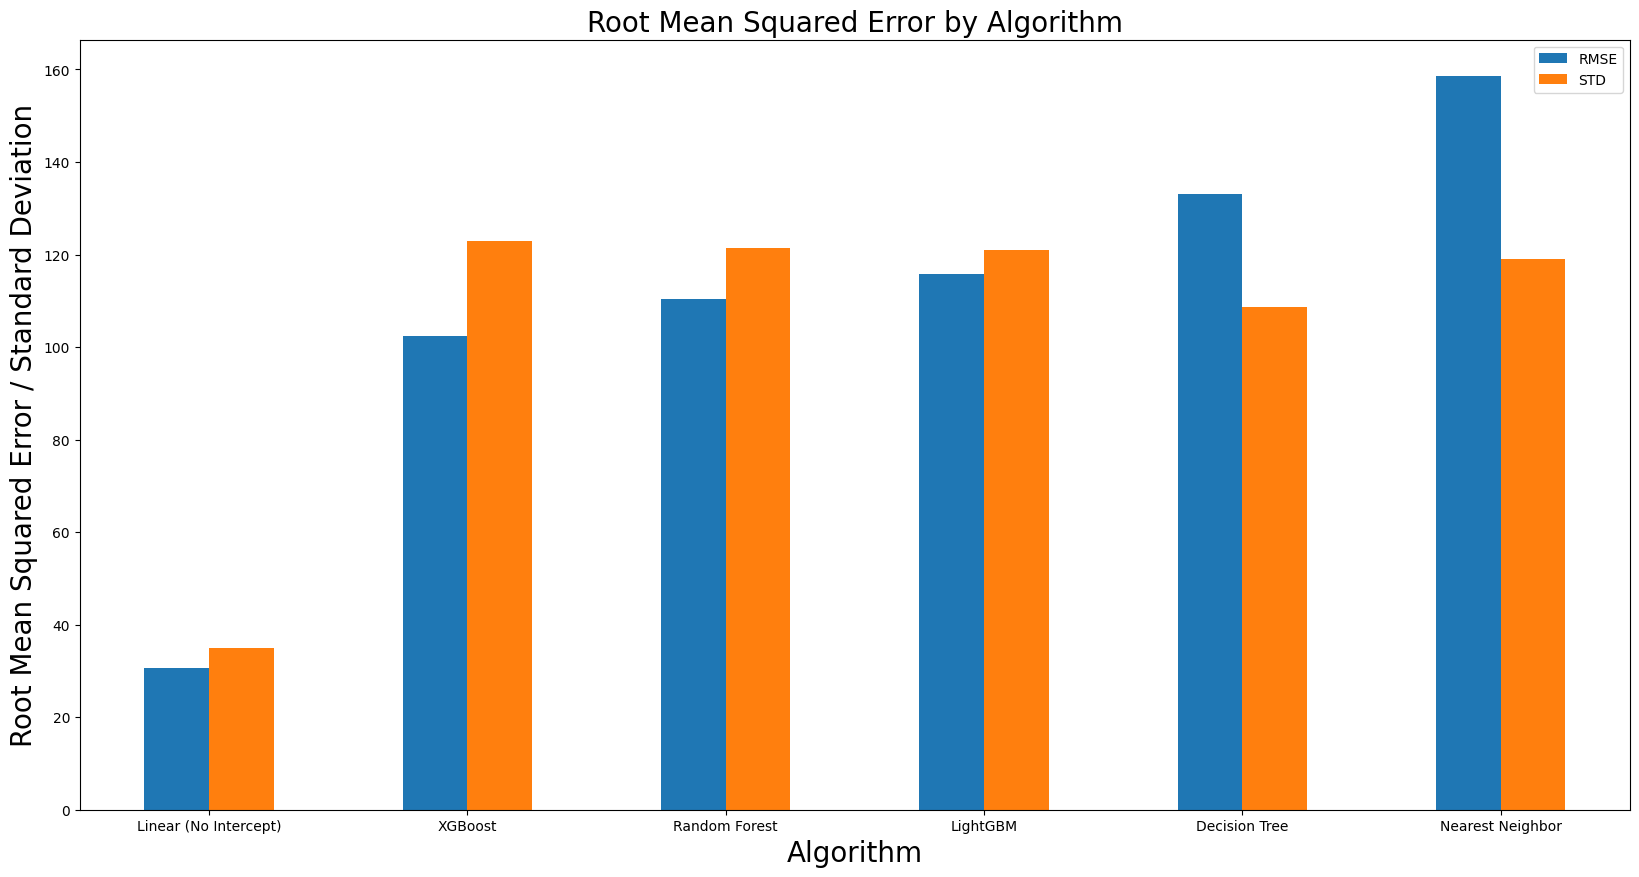

In [66]:
# creating the bar plot
data_df.plot(kind='bar',x = 'Algorithm', y = ['RMSE', 'STD'], figsize = (20,10), rot=0)
plt.xlabel("Algorithm",fontsize=20)
plt.ylabel("Root Mean Squared Error / Standard Deviation",fontsize=20)
plt.title("Root Mean Squared Error by Algorithm",fontsize=20)
plt.show()

We see that LInear with No Intercept works best.